# Project

### Import Modules

In [116]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error


### Loading Datasets

In [117]:
FILENAME= "calendar.csv"
DATADIR = "../pfda_project/"

calendar_df = pd.read_csv(DATADIR + FILENAME, header=0)

In [118]:
FILENAME= "inventory.csv"
DATADIR = "../pfda_project/"

inventory_df = pd.read_csv(DATADIR + FILENAME, header=0)

In [119]:
FILENAME= "sales_test.csv"
DATADIR = "../pfda_project/"

sales_test_df = pd.read_csv(DATADIR + FILENAME, header=0)

In [120]:
FILENAME= "sales_train.csv"
DATADIR = "../pfda_project/"

sales_train_df = pd.read_csv(DATADIR + FILENAME, low_memory=False)

In [121]:
FILENAME= "solution.csv"
DATADIR = "../pfda_project/"

solution_df = pd.read_csv(DATADIR + FILENAME)

In [122]:
FILENAME= "test_weights.csv"
DATADIR = "../pfda_project/"

test_weights_df = pd.read_csv(DATADIR + FILENAME)

### Information about datasets

##### calendar_df

In [123]:
calendar_df.head()

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1
4,2017-10-26,NaN,0,0,0,0,Prague_2


In [124]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23016 entries, 0 to 23015
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    23016 non-null  object
 1   holiday_name            930 non-null    object
 2   holiday                 23016 non-null  int64 
 3   shops_closed            23016 non-null  int64 
 4   winter_school_holidays  23016 non-null  int64 
 5   school_holidays         23016 non-null  int64 
 6   warehouse               23016 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


The earliest date in dataset

In [125]:
calendar_df.date.min()

'2016-01-01'

The latest date in dataset

In [126]:
calendar_df.date.max()

'2024-12-31'

##### inventory_df

In [127]:
inventory_df.head()

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,5255,2583,Pastry_196,Bakery,Bakery_L2_14,Bakery_L3_26,Bakery_L4_1,Prague_3
1,4948,2426,Herb_19,Fruit and vegetable,Fruit and vegetable_L2_30,Fruit and vegetable_L3_86,Fruit and vegetable_L4_1,Prague_3
2,2146,1079,Beet_2,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_65,Fruit and vegetable_L4_34,Prague_1
3,501,260,Chicken_13,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_27,Meat and fish_L4_5,Prague_1
4,4461,2197,Chicory_1,Fruit and vegetable,Fruit and vegetable_L2_17,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Frankfurt_1


In [128]:
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unique_id            5432 non-null   int64 
 1   product_unique_id    5432 non-null   int64 
 2   name                 5432 non-null   object
 3   L1_category_name_en  5432 non-null   object
 4   L2_category_name_en  5432 non-null   object
 5   L3_category_name_en  5432 non-null   object
 6   L4_category_name_en  5432 non-null   object
 7   warehouse            5432 non-null   object
dtypes: int64(2), object(6)
memory usage: 339.6+ KB


#### sales_test_df

In [129]:
sales_train_df.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0


In [130]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   unique_id        1048575 non-null  int64  
 1   date             1048575 non-null  object 
 2   warehouse        1048575 non-null  object 
 3   total_orders     1048556 non-null  float64
 4   sales            1048556 non-null  float64
 5   sell_price_main  1048575 non-null  float64
 6   availability     1048575 non-null  float64
 7   type_0_discount  1048575 non-null  float64
 8   type_1_discount  1048575 non-null  float64
 9   type_2_discount  1048575 non-null  float64
 10  type_3_discount  1048575 non-null  float64
 11  type_4_discount  1048575 non-null  float64
 12  type_5_discount  1048575 non-null  float64
 13  type_6_discount  1048575 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 112.0+ MB


The earliest date in dataset

In [131]:
sales_train_df.date.min()

'2020-08-01'

The latest date in dataset

In [132]:
sales_train_df.date.max()

'2024-06-02'

#### sales_test_df

In [133]:
sales_test_df.head(15)

,unique_id,date,warehouse,total_orders,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,1226,2024-06-03,Brno_1,8679.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,1226,2024-06-11,Brno_1,8795.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
2,1226,2024-06-13,Brno_1,10009.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
3,1226,2024-06-15,Brno_1,8482.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
4,1226,2024-06-09,Brno_1,8195.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
5,1226,2024-06-06,Brno_1,9538.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
6,1226,2024-06-12,Brno_1,9002.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
7,1226,2024-06-05,Brno_1,8501.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8,1226,2024-06-04,Brno_1,8492.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
9,1226,2024-06-08,Brno_1,8093.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
sales_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unique_id        47021 non-null  int64  
 1   date             47021 non-null  object 
 2   warehouse        47021 non-null  object 
 3   total_orders     47021 non-null  float64
 4   sell_price_main  47021 non-null  float64
 5   type_0_discount  47021 non-null  float64
 6   type_1_discount  47021 non-null  float64
 7   type_2_discount  47021 non-null  float64
 8   type_3_discount  47021 non-null  float64
 9   type_4_discount  47021 non-null  float64
 10  type_5_discount  47021 non-null  float64
 11  type_6_discount  47021 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.3+ MB


The earliest date in dataset

In [135]:
sales_test_df.date.min()

'2024-06-03'

The latest date in dataset

In [136]:
sales_test_df.date.max()

'2024-06-16'

#### solution_df

In [137]:
solution_df.head(5)

,id,sales_hat
0,1226_2024-06-03,23.256395
1,1226_2024-06-11,45.635086
2,1226_2024-06-13,45.881638
3,1226_2024-06-15,43.492690
4,1226_2024-06-09,22.463488


In [138]:
solution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59778 entries, 0 to 59777
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         59778 non-null  object 
 1   sales_hat  59778 non-null  float64
dtypes: float64(1), object(1)
memory usage: 934.2+ KB


#### test_weight_df

In [139]:
test_weights_df.head(5)

,unique_id,weight
0,0,2.535369
1,1,3.888933
2,2,5.885237
3,3,2.139552
4,5,3.021715


In [140]:
test_weights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  5390 non-null   int64  
 1   weight     5390 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 84.3 KB


This dataset will be used by organisators  of competition to evaluate solutions. I will not use it.

### Explanatory Data Analysis

In [141]:
# Merging
sales_calendar = sales_train_df.merge(calendar_df, on='date', how='left')


In [142]:
sales_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7340025 entries, 0 to 7340024
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   unique_id               int64  
 1   date                    object 
 2   warehouse_x             object 
 3   total_orders            float64
 4   sales                   float64
 5   sell_price_main         float64
 6   availability            float64
 7   type_0_discount         float64
 8   type_1_discount         float64
 9   type_2_discount         float64
 10  type_3_discount         float64
 11  type_4_discount         float64
 12  type_5_discount         float64
 13  type_6_discount         float64
 14  holiday_name            object 
 15  holiday                 int64  
 16  shops_closed            int64  
 17  winter_school_holidays  int64  
 18  school_holidays         int64  
 19  warehouse_y             object 
dtypes: float64(11), int64(5), object(4)
memory usage: 1.1+ GB


In [143]:
# Dropping redundant column
sales_calendar=sales_calendar.drop(columns='warehouse_y')
sales_calendar=sales_calendar.rename(columns={'warehouse_x':"warehouse"})

In [144]:
# Convert 'date' column to datetime
sales_calendar['date'] = pd.to_datetime(sales_calendar['date'])

# Add 'year' and 'month' columns
sales_calendar['year'] = sales_calendar['date'].dt.year
sales_calendar['month'] = sales_calendar['date'].dt.month
sales_calendar['day']=sales_calendar['date'].dt.month
sales_calendar['day_of_week'] = pd.to_datetime(sales_calendar['date']).dt.dayofweek
sales_calendar['weekend'] = sales_calendar['day_of_week'].isin([5, 6]).astype(int)
sales_calendar['holiday'] = sales_calendar['holiday'].fillna(0).astype(int)

In [145]:
# Changing integer values to string
sales_calendar['day_of_week']=sales_calendar['day_of_week'].astype('string')
sales_calendar['holiday']=sales_calendar['holiday'].astype('string')

In [146]:
# Changing numbers to day of week names, weekend, and holiday
day_map = {'0': 'Monday','1': 'Tuesday', '2': 'Wednesday', '3': 'Thursday', '4': 'Friday', '5': 'Saturday', '6': 'Sunday'}
sales_calendar['day_of_week'] = sales_calendar['day_of_week'].map(day_map)
holiday_map={'0': 'Not  a Holiday', '1':'Holiday'}
sales_calendar['holiday'] = sales_calendar['holiday'].map(holiday_map)

In [147]:
# Set date as index of dataframe
sales_calendar.set_index('date', inplace=True)

In [148]:
# Dataframes for every warehouse
prague_1_df = sales_calendar[sales_calendar['warehouse'] == 'Prague_1']
prague_2_df = sales_calendar[sales_calendar['warehouse'] == 'Prague_2']
prague_3_df = sales_calendar[sales_calendar['warehouse'] == 'Prague_3']
brno_1_df = sales_calendar[sales_calendar['warehouse'] == 'Brno_1']
budapest_1_df = sales_calendar[sales_calendar['warehouse'] == 'Budapest_1']
munich_1_df = sales_calendar[sales_calendar['warehouse'] == 'Munich_1']
frankfurt_1_df = sales_calendar[sales_calendar['warehouse'] == 'Frankfurt_1']


#### Summary daily sales

In [149]:
# Grouping values as for every warehouse there are thousands values for each day
prague_1_grouped=prague_1_df.groupby(prague_1_df.index).agg({'total_orders':'sum','sales': 'sum','holiday_name': 'first', 'holiday':'first', 'shops_closed':'first', 'winter_school_holidays':'first','school_holidays':'first', 'year':'first', 'month':'first', 'day':'first', 'day_of_week':'first'})
prague_2_grouped=prague_2_df.groupby(prague_2_df.index).agg({'total_orders':'sum','sales': 'sum','holiday_name': 'first', 'holiday':'first', 'shops_closed':'first', 'winter_school_holidays':'first','school_holidays':'first', 'year':'first', 'month':'first', 'day':'first', 'day_of_week':'first'})
prague_3_grouped=prague_3_df.groupby(prague_3_df.index).agg({'total_orders':'sum','sales': 'sum','holiday_name': 'first', 'holiday':'first', 'shops_closed':'first', 'winter_school_holidays':'first','school_holidays':'first', 'year':'first', 'month':'first', 'day':'first', 'day_of_week':'first'})
brno_1_grouped=brno_1_df.groupby(brno_1_df.index).agg({'total_orders':'sum','sales': 'sum','holiday_name': 'first', 'holiday':'first', 'shops_closed':'first', 'winter_school_holidays':'first','school_holidays':'first', 'year':'first', 'month':'first', 'day':'first', 'day_of_week':'first'})
budapest_1_grouped=budapest_1_df.groupby(budapest_1_df.index).agg({'total_orders':'sum','sales': 'sum','holiday_name': 'first', 'holiday':'first', 'shops_closed':'first', 'winter_school_holidays':'first','school_holidays':'first', 'year':'first', 'month':'first', 'day':'first', 'day_of_week':'first'})
munich_1_grouped=munich_1_df.groupby(munich_1_df.index).agg({'total_orders':'sum','sales': 'sum','holiday_name': 'first', 'holiday':'first', 'shops_closed':'first', 'winter_school_holidays':'first','school_holidays':'first', 'year':'first', 'month':'first', 'day':'first', 'day_of_week':'first'})
frankfurt_1_grouped=frankfurt_1_df.groupby(frankfurt_1_df.index).agg({'total_orders':'sum','sales': 'sum','holiday_name': 'first', 'holiday':'first', 'shops_closed':'first', 'winter_school_holidays':'first','school_holidays':'first', 'year':'first', 'month':'first', 'day':'first', 'day_of_week':'first'})

[Text(0.5, 1.0, 'Prague_1 warehouse summary daily sales')]

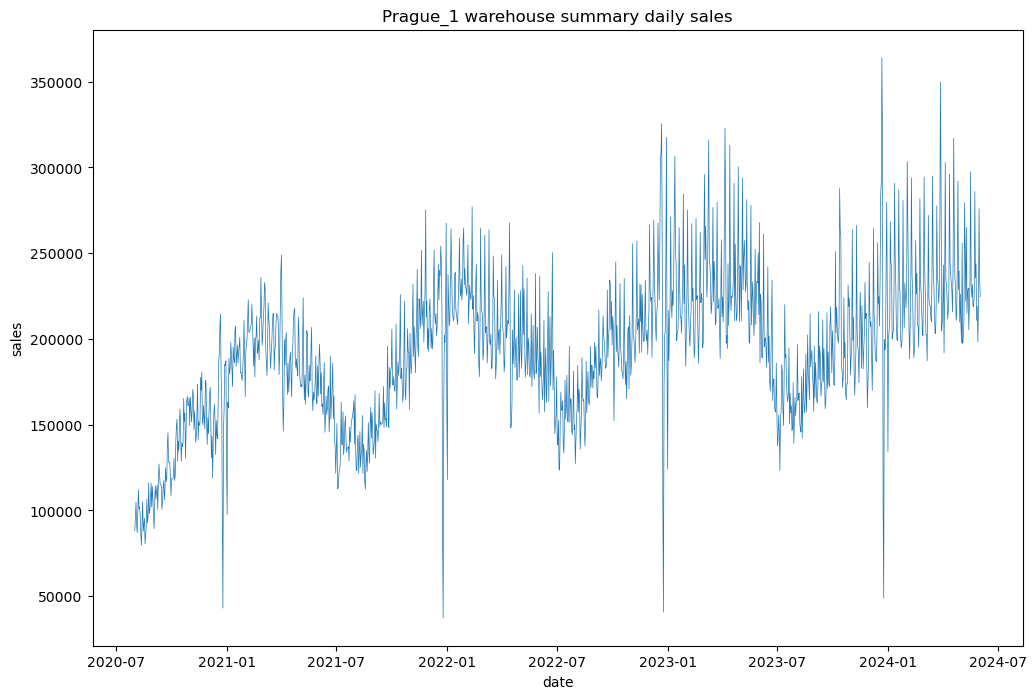

In [150]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=prague_1_grouped, x=prague_1_grouped.index, y=prague_1_grouped['sales'], linewidth=0.5, ).set(title='Prague_1 warehouse summary daily sales')

[Text(0.5, 1.0, 'Prague_2 warehouse summary daily sales')]

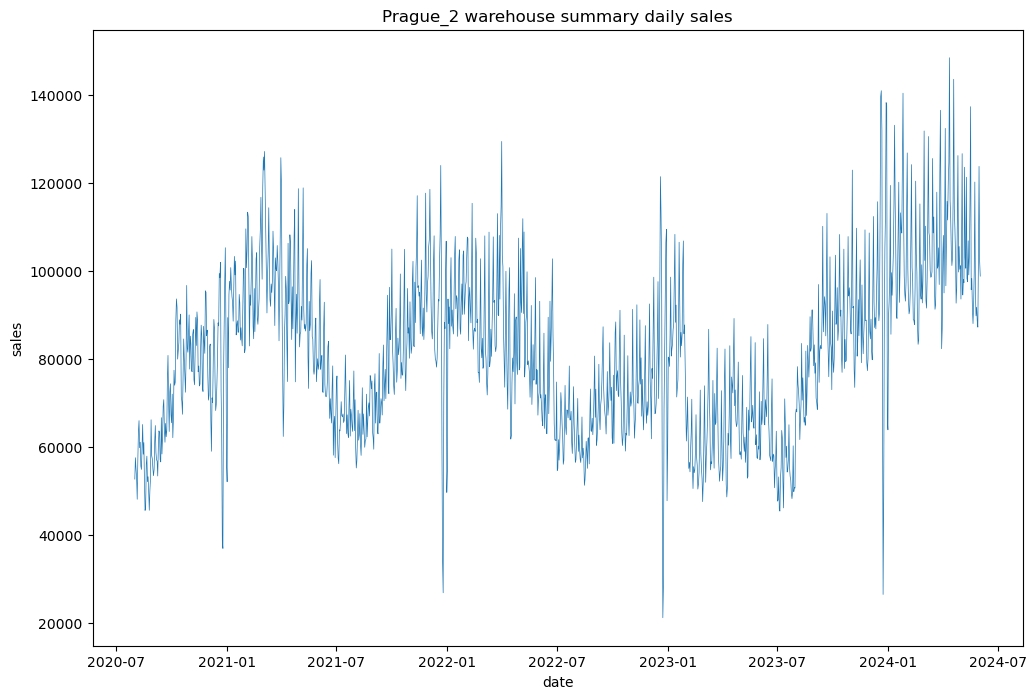

In [151]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=prague_2_grouped, x=prague_2_grouped.index, y=prague_2_grouped['sales'], linewidth=0.5, ).set(title='Prague_2 warehouse summary daily sales')

[Text(0.5, 1.0, 'Prague_3 warehouse summary daily sales')]

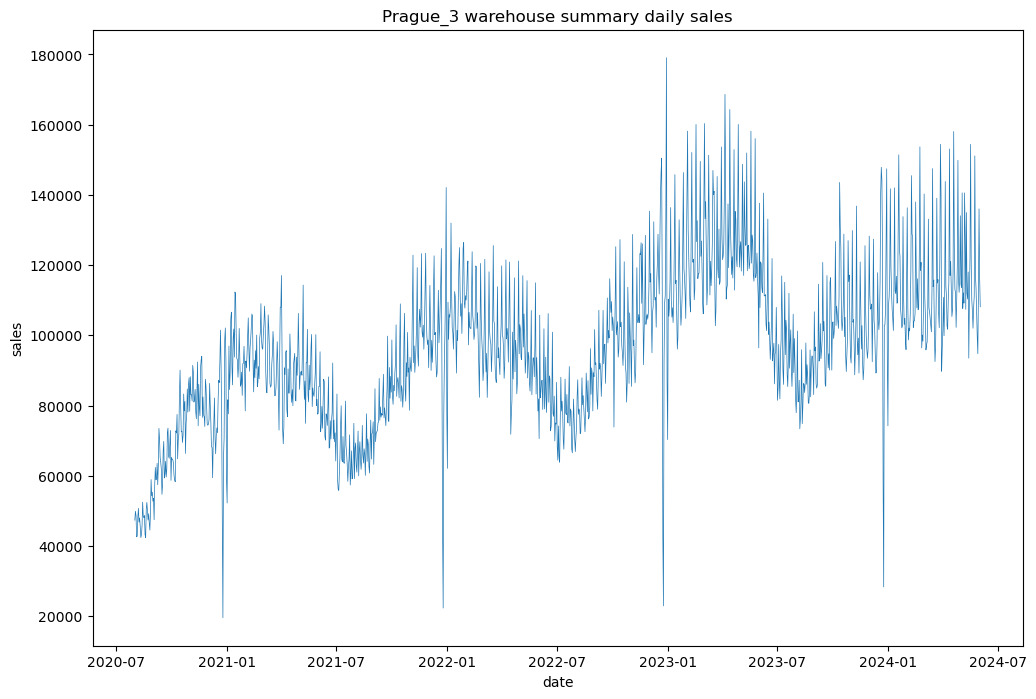

In [152]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=prague_3_grouped, x=prague_3_grouped.index, y=prague_3_grouped['sales'], linewidth=0.5, ).set(title='Prague_3 warehouse summary daily sales')

[Text(0.5, 1.0, 'Brno_1 warehouse summary daily sales')]

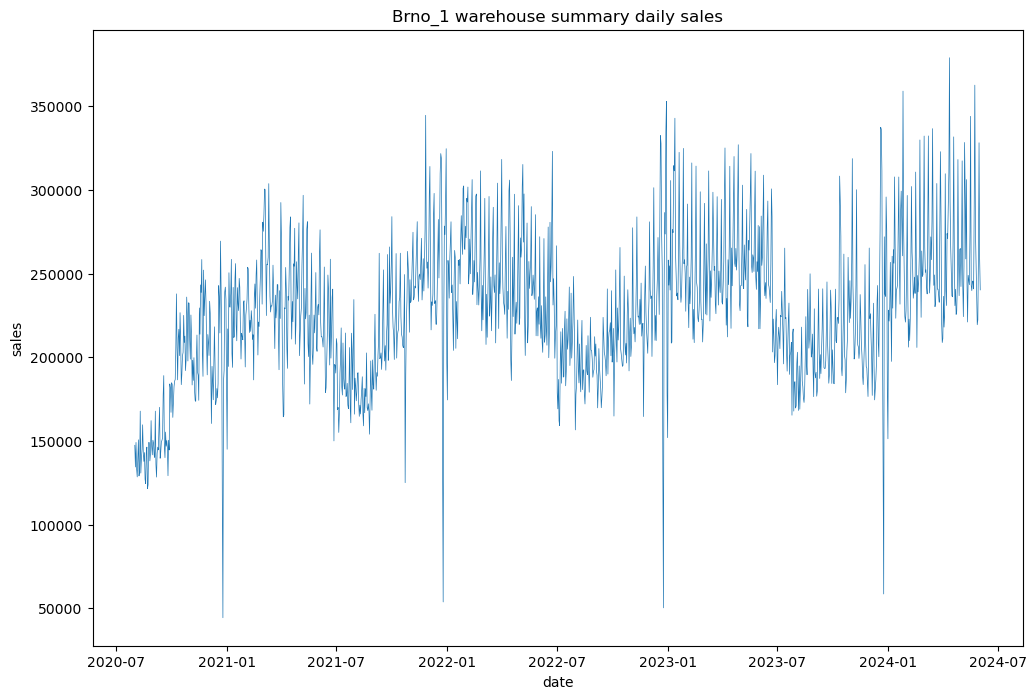

In [153]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=brno_1_grouped, x=brno_1_grouped.index, y=brno_1_grouped['sales'], linewidth=0.5, ).set(title='Brno_1 warehouse summary daily sales')

Prague and Brno are both in Czech Republic. Summary sales show simmilar repeated pattern of sales during every year with tendency to grow every year.

[Text(0.5, 1.0, 'Budapest_1 warehouse summary daily sales')]

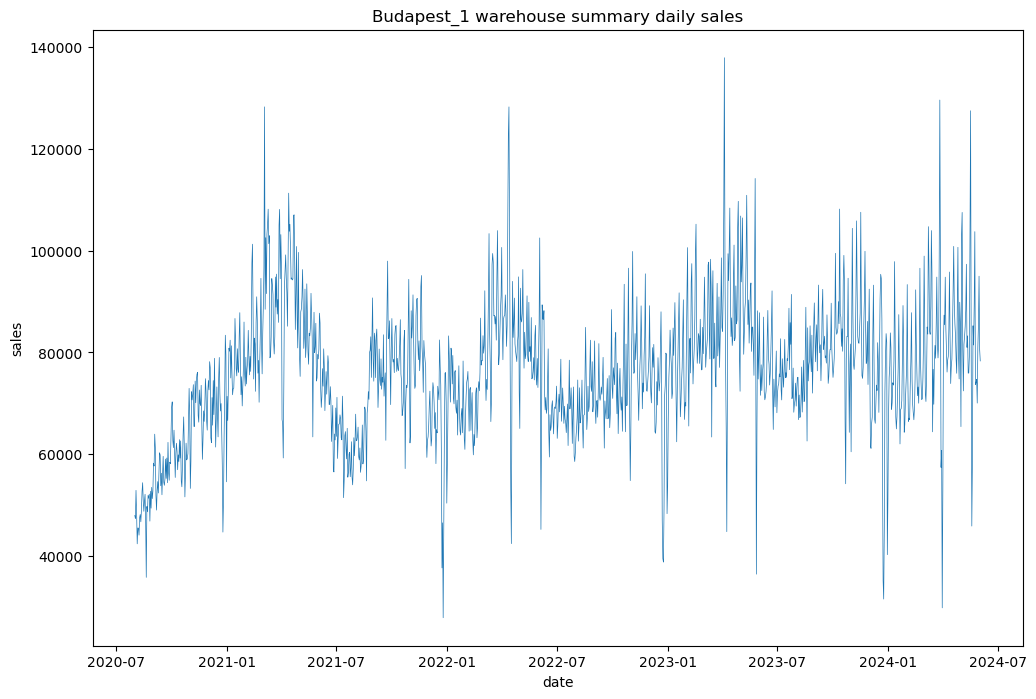

In [154]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=budapest_1_grouped, x=budapest_1_grouped.index, y=budapest_1_grouped['sales'], linewidth=0.5, ).set(title='Budapest_1 warehouse summary daily sales')

Budapest is the capital of Hungary. Summary sales plot shows again repeated pattern of sales over years, but a bit different than plots from Czech Republic. No tendency of growth over the years.

[Text(0.5, 1.0, 'Munich_1 warehouse summary daily sales')]

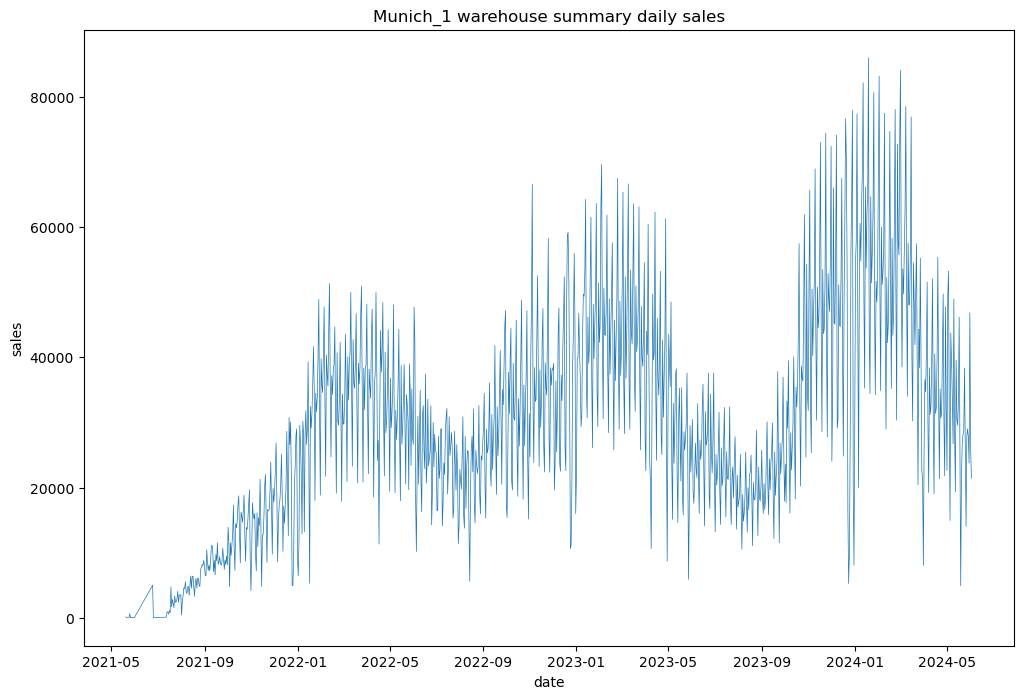

In [155]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=munich_1_grouped, x=munich_1_grouped.index, y=munich_1_grouped['sales'], linewidth=0.5, ).set(title='Munich_1 warehouse summary daily sales')

City of Munich is in Germany. Plot of summary daily sales shows again repeated pattern of sales over every year with tendency to grow each year.

[Text(0.5, 1.0, 'Frankfurt_1 warehouse summary daily sales')]

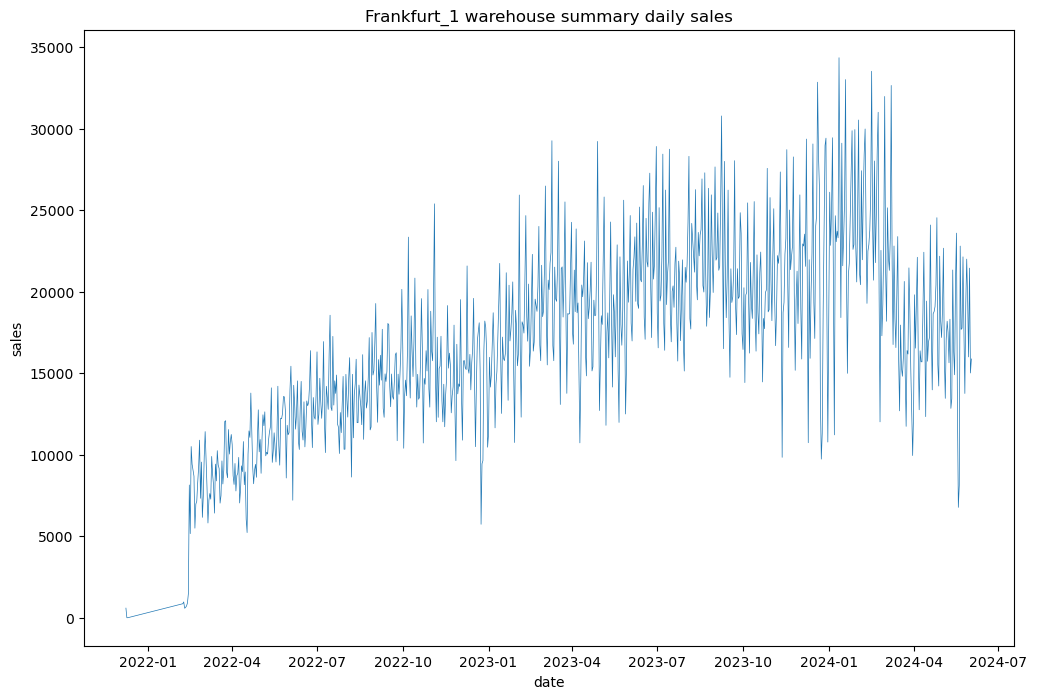

In [156]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=frankfurt_1_grouped, x=frankfurt_1_grouped.index, y=frankfurt_1_grouped['sales'], linewidth=0.5, ).set(title='Frankfurt_1 warehouse summary daily sales')

Even though, the city of Frankfurt is in Germany too, the plot is completely different thant Munich's. It does not seems to have repeated pattern for year period.

#### Average sales during weekdays

In [157]:
prague1_week_day_g=prague_1_grouped.groupby('day_of_week').agg({'sales':'mean'})
prague2_week_day_g=prague_2_grouped.groupby('day_of_week').agg({'sales':'mean'})
prague3_week_day_g=prague_3_grouped.groupby('day_of_week').agg({'sales':'mean'})
brno1_week_day_g=brno_1_grouped.groupby('day_of_week').agg({'sales':'mean'})
budapest1_week_day_g=budapest_1_grouped.groupby('day_of_week').agg({'sales':'mean'})
munich1_week_day_g=munich_1_grouped.groupby('day_of_week').agg({'sales':'mean'})
frankfurt1_week_day_g=frankfurt_1_grouped.groupby('day_of_week').agg({'sales':'mean'})

[Text(0.5, 1.0, 'Prague_1 warehouse average sales during weekdays')]

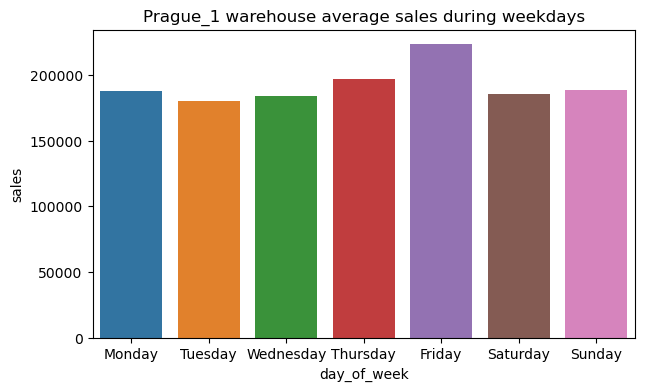

In [158]:
plt.figure(figsize=(7, 4))
sns.barplot(data=prague1_week_day_g, x=prague1_week_day_g.index, y=prague1_week_day_g['sales'],order=('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday') ).set(title='Prague_1 warehouse average sales during weekdays')

[Text(0.5, 1.0, 'Prague_2 warehouse average sales during weekdays')]

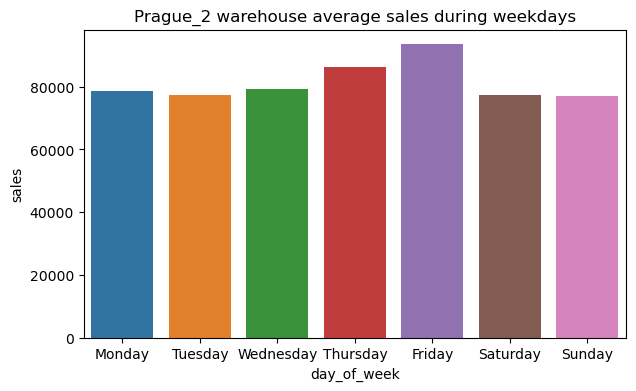

In [159]:
plt.figure(figsize=(7, 4))
sns.barplot(data=prague2_week_day_g, x=prague2_week_day_g.index, y=prague2_week_day_g['sales'],order=('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday') ).set(title='Prague_2 warehouse average sales during weekdays')

[Text(0.5, 1.0, 'Prague_3 warehouse average sales during weekdays')]

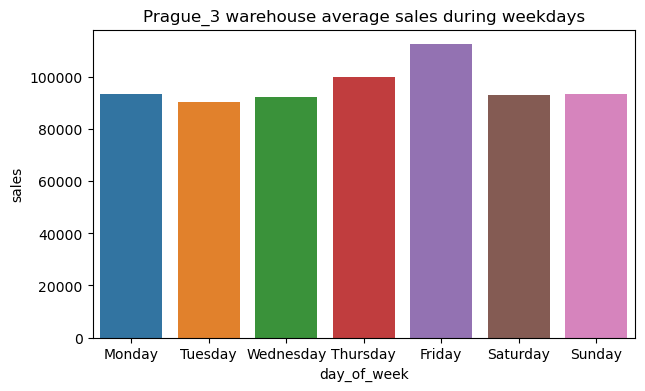

In [160]:
plt.figure(figsize=(7, 4))
sns.barplot(data=prague3_week_day_g, x=prague3_week_day_g.index, y=prague3_week_day_g['sales'],order=('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday') ).set(title='Prague_3 warehouse average sales during weekdays')

[Text(0.5, 1.0, 'Brno_1 warehouse average sales during weekdays')]

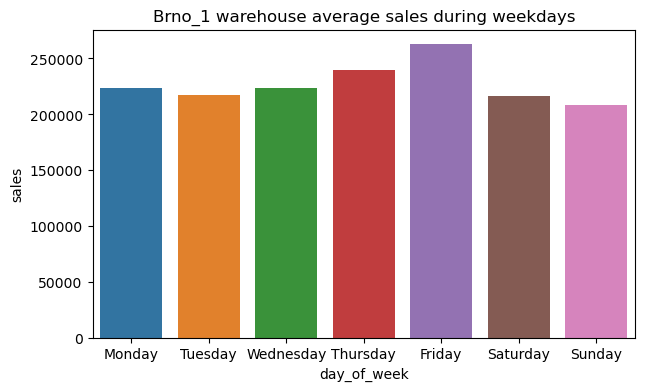

In [161]:
plt.figure(figsize=(7, 4))
sns.barplot(data=brno1_week_day_g, x=brno1_week_day_g.index, y=brno1_week_day_g['sales'],order=('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday') ).set(title='Brno_1 warehouse average sales during weekdays')

[Text(0.5, 1.0, 'Budapest_1 warehouse average sales during weekdays')]

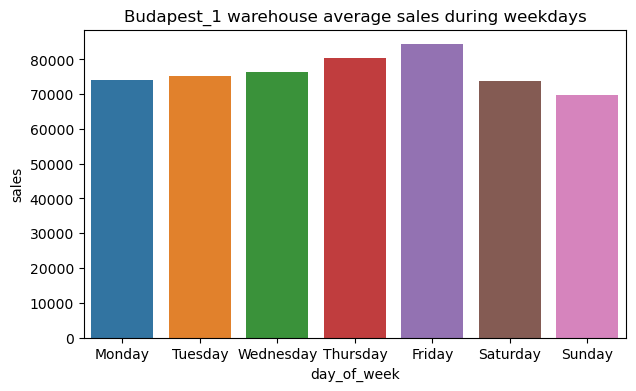

In [162]:
plt.figure(figsize=(7, 4))
sns.barplot(data=budapest1_week_day_g, x=budapest1_week_day_g.index, y=budapest1_week_day_g['sales'],order=('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday') ).set(title='Budapest_1 warehouse average sales during weekdays')

[Text(0.5, 1.0, 'Munich_1 warehouse average sales during weekdays')]

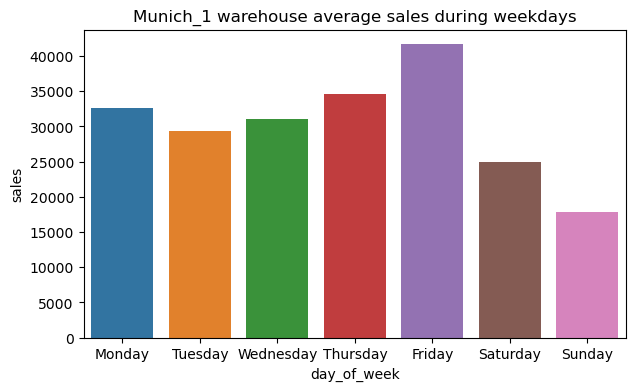

In [163]:
plt.figure(figsize=(7, 4))
sns.barplot(data=munich1_week_day_g, x=munich1_week_day_g.index, y=munich1_week_day_g['sales'],order=('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday') ).set(title='Munich_1 warehouse average sales during weekdays')

[Text(0.5, 1.0, 'Frankfurt_1 warehouse average sales during weekdays')]

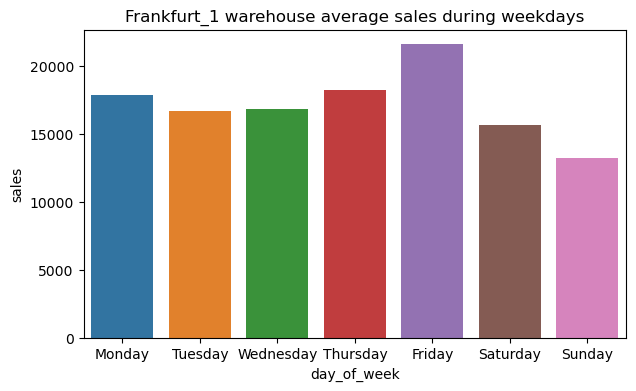

In [164]:
plt.figure(figsize=(7, 4))
sns.barplot(data=frankfurt1_week_day_g, x=frankfurt1_week_day_g.index, y=frankfurt1_week_day_g['sales'],order=('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday') ).set(title='Frankfurt_1 warehouse average sales during weekdays')

Plots of average sales during weekdays shows tendency of custumers in all countries to do shopping on Thurdays and Fridays.

#### Average monthly sales

In [165]:
prague1_month_g=prague_1_grouped.groupby('month').agg({'sales':'mean'})
prague2_month_g=prague_2_grouped.groupby('month').agg({'sales':'mean'})
prague3_month_g=prague_3_grouped.groupby('month').agg({'sales':'mean'})
brno1_month_g=brno_1_grouped.groupby('month').agg({'sales':'mean'})
budapest1_month_g=budapest_1_grouped.groupby('month').agg({'sales':'mean'})
munich1_month_g=munich_1_grouped.groupby('month').agg({'sales':'mean'})
frankfurt1_month_g=frankfurt_1_grouped.groupby('month').agg({'sales':'mean'})

[Text(0.5, 1.0, 'Prague_1 warehouse average monthly sales')]

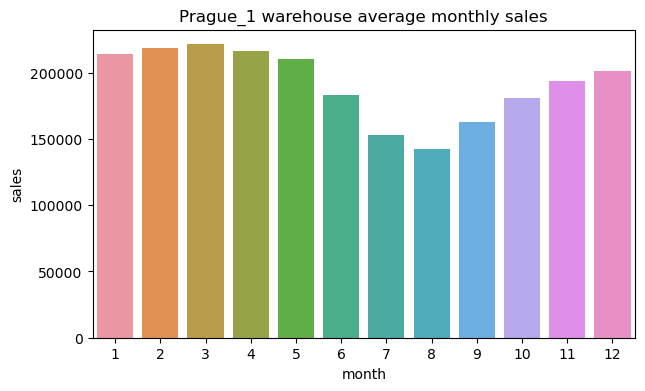

In [166]:
plt.figure(figsize=(7, 4))
sns.barplot(data=prague1_month_g, x=prague1_month_g.index, y=prague1_month_g['sales'] ).set(title='Prague_1 warehouse average monthly sales')

[Text(0.5, 1.0, 'Prague_2 warehouse average monthly sales')]

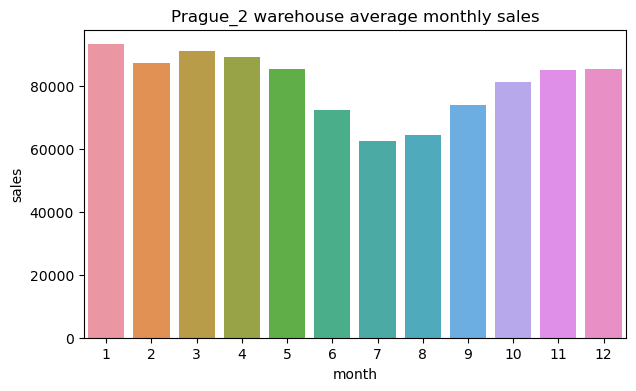

In [167]:
plt.figure(figsize=(7, 4))
sns.barplot(data=prague2_month_g, x=prague2_month_g.index, y=prague2_month_g['sales'] ).set(title='Prague_2 warehouse average monthly sales')

[Text(0.5, 1.0, 'Prague_3 warehouse average monthly sales')]

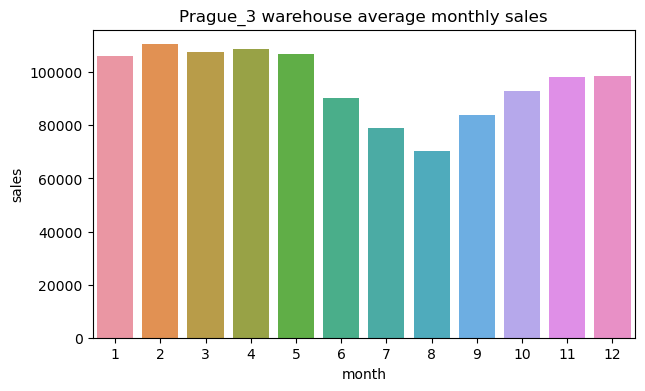

In [168]:
plt.figure(figsize=(7, 4))
sns.barplot(data=prague3_month_g, x=prague3_month_g.index, y=prague3_month_g['sales'] ).set(title='Prague_3 warehouse average monthly sales')

[Text(0.5, 1.0, 'Brno_1 warehouse average monthly sales')]

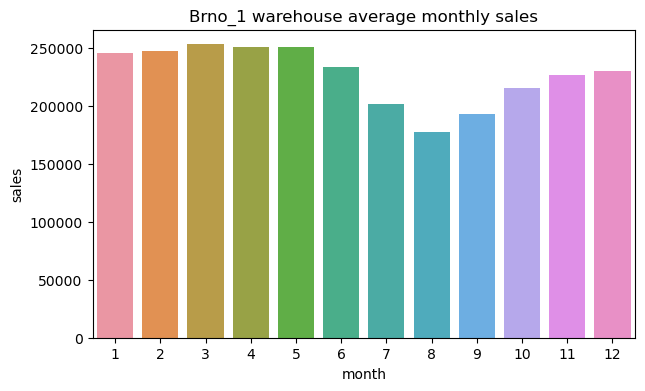

In [169]:
plt.figure(figsize=(7, 4))
sns.barplot(data=brno1_month_g, x=brno1_month_g.index, y=brno1_month_g['sales'] ).set(title='Brno_1 warehouse average monthly sales')

[Text(0.5, 1.0, 'Budapest_1 warehouse average monthly sales')]

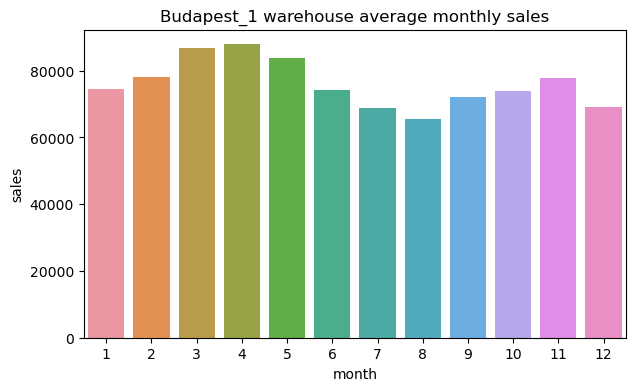

In [170]:
plt.figure(figsize=(7, 4))
sns.barplot(data=budapest1_month_g, x=budapest1_month_g.index, y=budapest1_month_g['sales'] ).set(title='Budapest_1 warehouse average monthly sales')

[Text(0.5, 1.0, 'Munich_1 warehouse average monthly sales')]

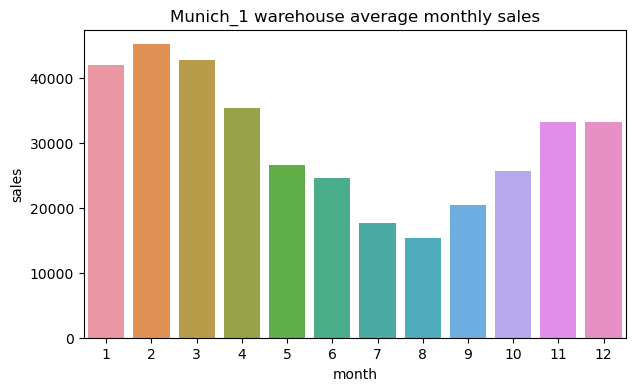

In [171]:
plt.figure(figsize=(7, 4))
sns.barplot(data=munich1_month_g, x=munich1_month_g.index, y=munich1_month_g['sales'] ).set(title='Munich_1 warehouse average monthly sales')

[Text(0.5, 1.0, 'Frankfurt_1 warehouse average monthly sales')]

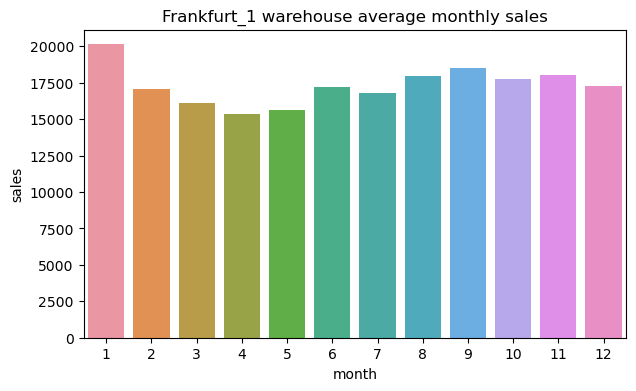

In [172]:
plt.figure(figsize=(7, 4))
sns.barplot(data=frankfurt1_month_g, x=frankfurt1_month_g.index, y=frankfurt1_month_g['sales'] ).set(title='Frankfurt_1 warehouse average monthly sales')

Plots of average monthly sales seems to reflect regionally differences in shopping habits of customers.

#### Average sales during holidays and common days

In [173]:
prague1_holiday_g=prague_1_grouped.groupby('holiday').agg({'sales':'mean'})
prague2_holiday_g=prague_2_grouped.groupby('holiday').agg({'sales':'mean'})
prague3_holiday_g=prague_3_grouped.groupby('holiday').agg({'sales':'mean'})
brno1_holiday_g=brno_1_grouped.groupby('holiday').agg({'sales':'mean'})
budapest1_holiday_g=budapest_1_grouped.groupby('holiday').agg({'sales':'mean'})
munich1_holiday_g=munich_1_grouped.groupby('holiday').agg({'sales':'mean'})
frankfurt1_holiday_g=frankfurt_1_grouped.groupby('holiday').agg({'sales':'mean'})

[Text(0.5, 1.0, 'Prague_1 average sales during holidays and common days')]

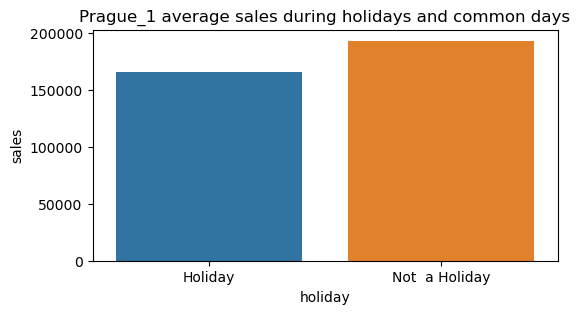

In [174]:
plt.figure(figsize=(6, 3))
sns.barplot(data=prague1_holiday_g, x=prague1_holiday_g.index, y=prague1_holiday_g['sales'] ).set(title='Prague_1 average sales during holidays and common days')

[Text(0.5, 1.0, 'Prague_2 average sales during holidays and common days')]

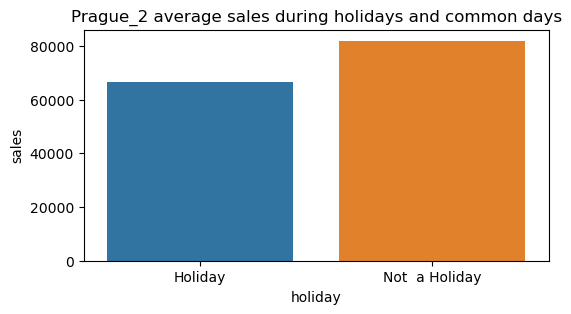

In [175]:
plt.figure(figsize=(6, 3))
sns.barplot(data=prague2_holiday_g, x=prague2_holiday_g.index, y=prague2_holiday_g['sales'] ).set(title='Prague_2 average sales during holidays and common days')

[Text(0.5, 1.0, 'Prague_3 average sales during holidays and common days')]

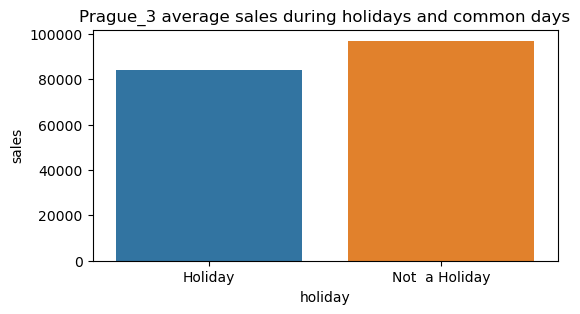

In [176]:
plt.figure(figsize=(6, 3))
sns.barplot(data=prague3_holiday_g, x=prague3_holiday_g.index, y=prague3_holiday_g['sales'] ).set(title='Prague_3 average sales during holidays and common days')

[Text(0.5, 1.0, 'Brno_1 average sales during holidays and common days')]

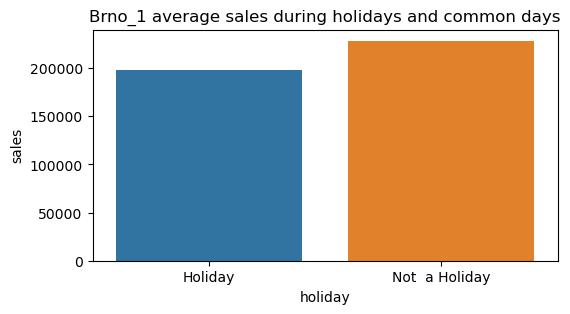

In [177]:
plt.figure(figsize=(6, 3))
sns.barplot(brno1_holiday_g, x=brno1_holiday_g.index, y=brno1_holiday_g['sales'] ).set(title='Brno_1 average sales during holidays and common days')

[Text(0.5, 1.0, 'Budapest_1 average sales during holidays and common days')]

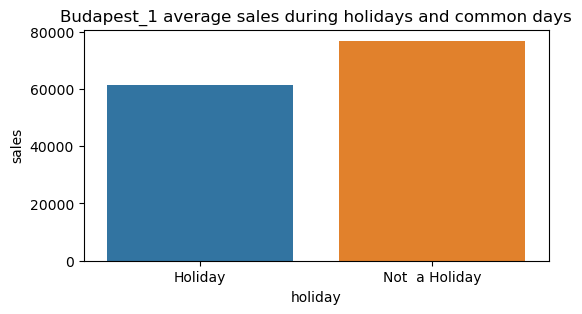

In [178]:
plt.figure(figsize=(6, 3))
sns.barplot(data=budapest1_holiday_g, x=budapest1_holiday_g.index, y=budapest1_holiday_g['sales'] ).set(title='Budapest_1 average sales during holidays and common days')

[Text(0.5, 1.0, 'Munich_1 average sales during holidays and common days')]

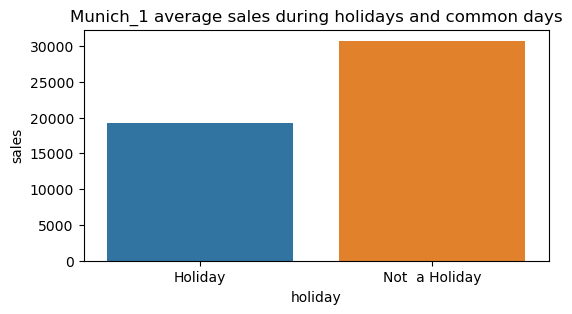

In [179]:
plt.figure(figsize=(6, 3))
sns.barplot(data=munich1_holiday_g, x=munich1_holiday_g.index, y=munich1_holiday_g['sales'] ).set(title='Munich_1 average sales during holidays and common days')

[Text(0.5, 1.0, 'Frankfurt_1 average sales during holidays and common days')]

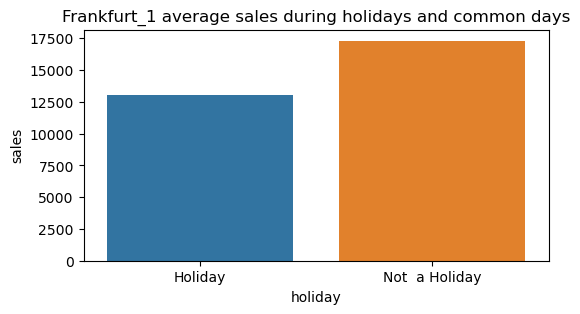

In [180]:
plt.figure(figsize=(6, 3))
sns.barplot(data=frankfurt1_holiday_g, x=frankfurt1_holiday_g.index, y=frankfurt1_holiday_g['sales'] ).set(title='Frankfurt_1 average sales during holidays and common days')

### Neural network for prediction

#### Data preparation

In [181]:
# Merging datasets

data_df = sales_train_df.merge(calendar_df, on='date', how='left').merge(inventory_df, on='unique_id', how='left')


In [182]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7340025 entries, 0 to 7340024
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   unique_id               int64  
 1   date                    object 
 2   warehouse_x             object 
 3   total_orders            float64
 4   sales                   float64
 5   sell_price_main         float64
 6   availability            float64
 7   type_0_discount         float64
 8   type_1_discount         float64
 9   type_2_discount         float64
 10  type_3_discount         float64
 11  type_4_discount         float64
 12  type_5_discount         float64
 13  type_6_discount         float64
 14  holiday_name            object 
 15  holiday                 int64  
 16  shops_closed            int64  
 17  winter_school_holidays  int64  
 18  school_holidays         int64  
 19  warehouse_y             object 
 20  product_unique_id       int64  
 21  name                    object 

In [183]:
# Dropping redundant column
data_df=data_df.drop(columns='warehouse_y')
data_df=data_df.drop(columns='warehouse_x')

In [184]:
# Datetime features
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['day_of_week'] = data_df['date'].dt.dayofweek
data_df['month'] = data_df['date'].dt.month
data_df['is_weekend'] = data_df['day_of_week'].isin([5, 6]).astype(int)
data_df['is_holiday'] = data_df['holiday'].fillna(0).astype(int)

In [185]:
# Lagging features
for lag in [1, 7, 30]:
    data_df[f'sales_lag_{lag}'] = data_df.groupby('unique_id')['sales'].shift(lag)

In [186]:
# Rolling features
data_df['rolling_mean_7'] = data_df.groupby('unique_id')['sales'].shift(1).rolling(window=7).mean()

In [187]:
# Drop rows with NaN values after feature engineering
data_df = data_df.dropna()

In [188]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306946 entries, 77 to 7339967
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   unique_id               306946 non-null  int64         
 1   date                    306946 non-null  datetime64[ns]
 2   total_orders            306946 non-null  float64       
 3   sales                   306946 non-null  float64       
 4   sell_price_main         306946 non-null  float64       
 5   availability            306946 non-null  float64       
 6   type_0_discount         306946 non-null  float64       
 7   type_1_discount         306946 non-null  float64       
 8   type_2_discount         306946 non-null  float64       
 9   type_3_discount         306946 non-null  float64       
 10  type_4_discount         306946 non-null  float64       
 11  type_5_discount         306946 non-null  float64       
 12  type_6_discount         3069

In [189]:
# Encoding
encode=LabelEncoder()
data_df['holiday_name']=encode.fit_transform(data_df['holiday_name'])
data_df['name']=encode.fit_transform(data_df['name'])
data_df['L1_category_name_en']=encode.fit_transform(data_df['L1_category_name_en'])
data_df['L2_category_name_en']=encode.fit_transform(data_df['L2_category_name_en'])
data_df['L3_category_name_en']=encode.fit_transform(data_df['L3_category_name_en'])
data_df['L4_category_name_en']=encode.fit_transform(data_df['L4_category_name_en'])
data_df['warehouse']=encode.fit_transform(data_df['warehouse'])

In [190]:
# Train-Test Split
X = data_df.drop(columns=['sales', 'unique_id', 'date'])
y = data_df['sales']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Model and prediction

In [192]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

In [193]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [209]:
# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)])

Epoch 1/50
7674/7674 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 12251.4219 - mae: 22.1420 - val_loss: 8581.1025 - val_mae: 17.1198
Epoch 2/50
7674/7674 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 10664.0947 - mae: 21.5015 - val_loss: 9169.3018 - val_mae: 23.9528
Epoch 3/50
7674/7674 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 11081.7686 - mae: 21.4296 - val_loss: 8165.8594 - val_mae: 17.1464
Epoch 4/50
7674/7674 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 15663.3320 - mae: 22.0570 - val_loss: 8532.4990 - val_mae: 17.6428
Epoch 5/50
7674/7674 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 12850.7197 - mae: 21.9239 - val_loss: 8034.8047 - val_mae: 16.8156
Epoch 6/50
7674/7674 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 10754.5322 - mae: 21.2959 - val_loss: 8302.4492 - val_mae: 18.2353
Epoch 7/50
7674/7674 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 11170.8428 - mae: 21.3824 - val_loss: 8290.4043 - val_mae: 17.5935
Epoch 8/50
7674/7674 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 14963.4385 - mae: 22.0139 -

In [211]:
# Evaluate on validation with MAE
val_preds = model.predict(X_val).ravel()
val_mae = mean_absolute_error(y_val, val_preds)
print("Validation MAE:", val_mae)

1919/1919 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Validation MAE: 16.46403714750706


A value of mean absolute error below 10% is great, 10% to 20% is still good, and above 50% means that model is inaccurate.
https://www.vexpower.com/brief/mean-absolute-percentage-error#:~:text=Average%20this%20to%20find%20the,y%2C%20and%20you%20have%20MAPE.&text=Generally%20speaking%2C%20a%20value%20below,more%20than%20you're%20right.

In [212]:
# Merging
sales_test = sales_test_df.merge(calendar_df, on='date', how='left').merge(inventory_df, on='unique_id', how='left')

# Dropping redundant column
sales_test=sales_test.drop(columns='warehouse_y')
sales_test=sales_test.drop(columns='warehouse_x')

# Datetime features
sales_test['date'] = pd.to_datetime(sales_test['date'])
sales_test['day_of_week'] = sales_test['date'].dt.dayofweek
sales_test['month'] = sales_test['date'].dt.month
sales_test['is_weekend'] = sales_test['day_of_week'].isin([5, 6]).astype(int)
sales_test['is_holiday'] = sales_test['holiday'].fillna(0).astype(int)

# Encoding
encode=LabelEncoder()
sales_test['holiday_name']=encode.fit_transform(sales_test['holiday_name'])
sales_test['name']=encode.fit_transform(sales_test['name'])
sales_test['L1_category_name_en']=encode.fit_transform(sales_test['L1_category_name_en'])
sales_test['L2_category_name_en']=encode.fit_transform(sales_test['L2_category_name_en'])
sales_test['L3_category_name_en']=encode.fit_transform(sales_test['L3_category_name_en'])
sales_test['L4_category_name_en']=encode.fit_transform(sales_test['L4_category_name_en'])
sales_test['warehouse']=encode.fit_transform(sales_test['warehouse'])



In [213]:
#Get features used during training
required_features = scaler.feature_names_in_

# Prepare the test dataset
sales_test_matched = sales_test.drop(columns=['unique_id', 'date'], errors='ignore')

# Add missing columns
for feature in required_features:
    if feature not in sales_test_matched.columns:
        sales_test_matched[feature] = float('nan')

# Reorder columns
sales_test_matched = sales_test_matched[required_features]

# Handle missing values
sales_test_matched.fillna(0, inplace=True)

# Transform the test data
X_test_scaled = scaler.transform(sales_test_matched)

# Predict sales
sales_test['sales_hat'] = model.predict(X_test_scaled)


10286/10286 ━━━━━━━━━━━━━━━━━━━━ 8s 794us/step


In [214]:
sales_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329147 entries, 0 to 329146
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   unique_id               329147 non-null  int64         
 1   date                    329147 non-null  datetime64[ns]
 2   total_orders            329147 non-null  float64       
 3   sell_price_main         329147 non-null  float64       
 4   type_0_discount         329147 non-null  float64       
 5   type_1_discount         329147 non-null  float64       
 6   type_2_discount         329147 non-null  float64       
 7   type_3_discount         329147 non-null  float64       
 8   type_4_discount         329147 non-null  float64       
 9   type_5_discount         329147 non-null  float64       
 10  type_6_discount         329147 non-null  float64       
 11  holiday_name            329147 non-null  int32         
 12  holiday                 329147

In [215]:
sales_test=sales_test.drop_duplicates().reset_index()

### Saving final solution

In [217]:
sales_test['id'] = sales_test['unique_id'].astype(str) + '_' + sales_test['date'].astype(str)

solution_df = sales_test[['id', 'sales_hat']].copy()
solution_df.to_csv('solution.csv', index=False)

print("Final solution saved as solution.csv")
print(solution_df.head(10))


Final solution saved as solution.csv
                id  sales_hat
0  1226_2024-06-03   3.009137
1  1226_2024-06-11  21.846508
2  1226_2024-06-13  17.855267
3  1226_2024-06-15  17.628735
4  1226_2024-06-09  -0.101123
5  1226_2024-06-09  -0.101092
6  1226_2024-06-06  -0.540973
7  1226_2024-06-12  19.569500
8  1226_2024-06-05   0.904645
9  1226_2024-06-04   1.934522


***
### End